# ***AeroFit Business Case***

In [1]:
import pandas as pd                                       # Importing the required libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statements:
1. Firstly Aerofit wants to identify the characteristics of the target audience for each type of treadmill offered by the company so that company can recommend best suitable treadmills to customers.
2. Secondly Aerofit team decides to investigate whether there are any differences across the product with respect to customer characteristics.
3. Company wants to create a customer profile for each AeroFit treadmill product.
4. Aerofit wants to cater for the needs of all major categories of the customers in health sector.
5. Expand the customer base and satisfaction for the products offered.
6. Make Aerofit able to provide a better recommendation of the treadmills to the new customers. 

------------------------------------------------------

## 1. Exploration and Pre processing of the data.

In [2]:
df=pd.read_csv('aerofit_treadmill.csv')        # Importing the dataset netflix as dataframe and naming it df.

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape             # Gives the number of rows and columns in the dataset.

(180, 9)

180 records and 9 different attributes are present in the dataset

In [5]:
df.duplicated().value_counts()                        # Checking for any duplicate records.

False    180
dtype: int64

No duplicates in the dataset

In [6]:
df.info()                # Checking all the attributes and their datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


No null or missing values present in any record. Also there is no price column included in dataset. So we need to include it for the analysis. 

In [7]:
df.describe()          # Stast of all the numeric attributes.

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df['Product'].value_counts()                     # Count of all unique values in the products attribute.

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [9]:
# Number of males and females.
gender_series = df['Gender'].value_counts()     
gender_series

Male      104
Female     76
Name: Gender, dtype: int64

Now we need to add the type of treadmill and the price columns for our analysis.

In [10]:
df['Age'].unique()           # To get an idea of the age group of the customers.

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

The customers of aerofit are of age ranging from 18 to 50 years.

In [11]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

The customers are having 12 to 21 years of education.

In [12]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

Average number of times the customers planned to use the treadmill in a week lies in a range of 2-7 times.

In [13]:
df['Miles'].sort_values()

117     21
19      38
51      38
59      38
106     42
      ... 
155    240
170    260
167    280
166    300
173    360
Name: Miles, Length: 180, dtype: int64

Average Number of miles customers planned to cover/run on the treadmill in a week varies from 21 miles to 360 miles.

In [14]:
# Creating a column defining the product type.
def map_Product_type(Product):
    if Product == 'KP281':
        return 'Entry level'
    elif Product == 'KP481':
        return 'Mid level'
    else:
        return 'Pro level'

# Apply the mapping function to create a new column
df['Product_type'] = df['Product'].apply(map_Product_type)

In [15]:
# Creating a column defining the price of the product.
def map_Product_price(Product):
    if Product == 'KP281':
        return 1500
    elif Product == 'KP481':
        return 1750
    else:
        return 2500

# Apply the mapping function to create a new column
df['Price'] = df['Product'].apply(map_Product_price)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_type,Price
0,KP281,18,Male,14,Single,3,4,29562,112,Entry level,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Entry level,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,Entry level,1500
3,KP281,19,Male,12,Single,3,3,32973,85,Entry level,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,Entry level,1500
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Pro level,2500
176,KP781,42,Male,18,Single,5,4,89641,200,Pro level,2500
177,KP781,45,Male,16,Single,5,5,90886,160,Pro level,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,Pro level,2500


In [16]:
# We need to divide the customers into groups on the basis of their age for better analysis.
# Defining age bins
bins = [15, 20, 25, 30, 35, 40, 45, 50]

# Use pd.cut to categorize ages into bins
df['Age_Bin'] = pd.cut(df['Age'], bins=bins)

In [17]:
# We need to divide the customers into groups on the basis of their Income for better analysis.
# Defining Income bins
bins = [25000,35000,45000,55000,65000,75000,85000,95000,105000]

# Use pd.cut to categorize ages into bins
df['Inc_bin'] = pd.cut(df['Income'], bins=bins)

In [18]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_type,Price,Age_Bin,Inc_bin
0,KP281,18,Male,14,Single,3,4,29562,112,Entry level,1500,"(15, 20]","(25000, 35000]"
1,KP281,19,Male,15,Single,2,3,31836,75,Entry level,1500,"(15, 20]","(25000, 35000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,Entry level,1500,"(15, 20]","(25000, 35000]"
3,KP281,19,Male,12,Single,3,3,32973,85,Entry level,1500,"(15, 20]","(25000, 35000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,Entry level,1500,"(15, 20]","(35000, 45000]"


Now we are done with Data Pre-processing and we can now proceed to the interprete correlations and visualizations

--------------------------------------------

## 2. Correlations, Visualizations and Probabilities.

In [19]:
# Number of males and females.
gender_series = df['Gender'].value_counts()     
gender_series

Male      104
Female     76
Name: Gender, dtype: int64

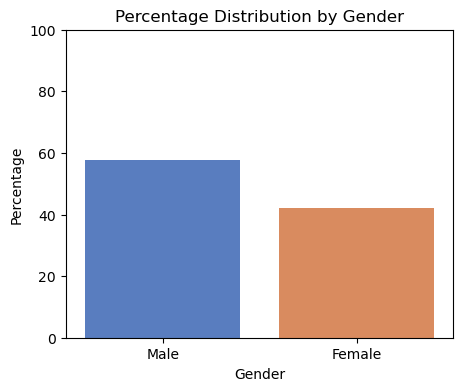

In [20]:
# Univariant percentage of Males and Females.
percentage_series = (gender_series / gender_series.sum()) * 100
plt.figure(figsize=(5, 4))  # Adjust figure size if needed
sns.barplot(x=percentage_series.index, y=percentage_series.values, palette='muted')  # You can adjust palette if needed
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage Distribution by Gender')
plt.ylim(0, 100)  # Ensure the y-axis starts from 0 to 100
plt.show()

About 60% of the customers are male.

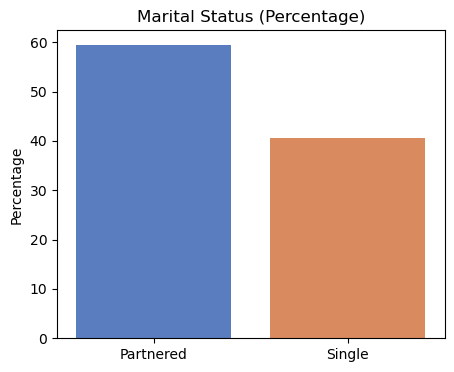

In [21]:
# Percentage of population on the basis of marital status.
marital_series = df['MaritalStatus'].value_counts()

# Calculate percentages
total = marital_series.sum()
marital_percentages = (marital_series / total) * 100

# Plotting
plt.figure(figsize=(5, 4))  # Adjust figure size if needed
sns.barplot(x=marital_percentages.index, y=marital_percentages.values, palette='muted')  
# Use 'hue' to differentiate between genders
plt.ylabel('Percentage')
plt.title('Marital Status (Percentage)')
plt.show()


60% customers are partnered.

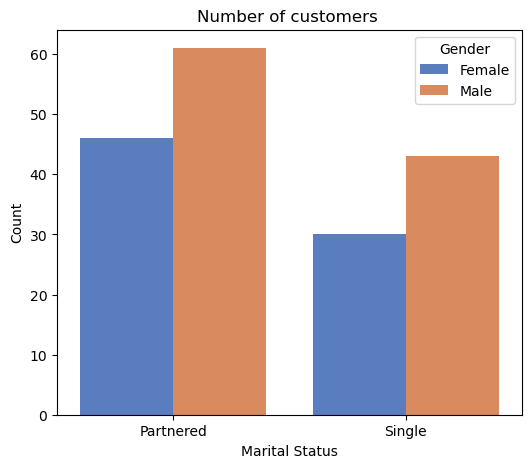

In [22]:
# Number of males and females of each marital status.
mar = df.groupby(['MaritalStatus', 'Gender']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(6, 5))  # Adjust figure size if needed
sns.barplot(data=mar, x='MaritalStatus', y='Count', hue='Gender', palette='muted')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Number of customers ')
plt.legend(title='Gender')
plt.show()

Male customers are dominating the count in both single and partnered category.

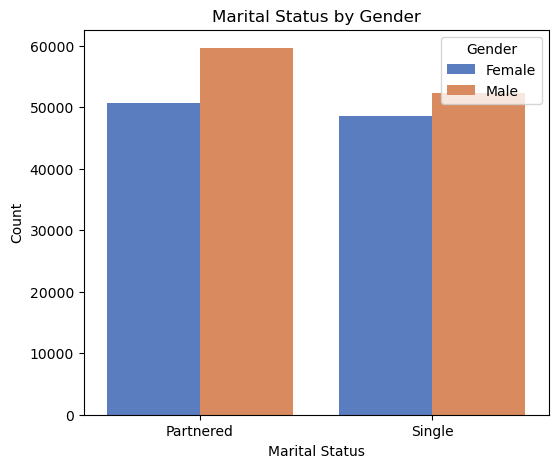

In [23]:
# Number of males and females of each marital status.
mad = df.groupby(['MaritalStatus', 'Gender'])['Income'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 5))  # Adjust figure size if needed
sns.barplot(data=mad, x='MaritalStatus', y='Income', hue='Gender', palette='muted')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status by Gender')
plt.legend(title='Gender')
plt.show()

Average income of males customers is more in both Partnered as well as in Single category.

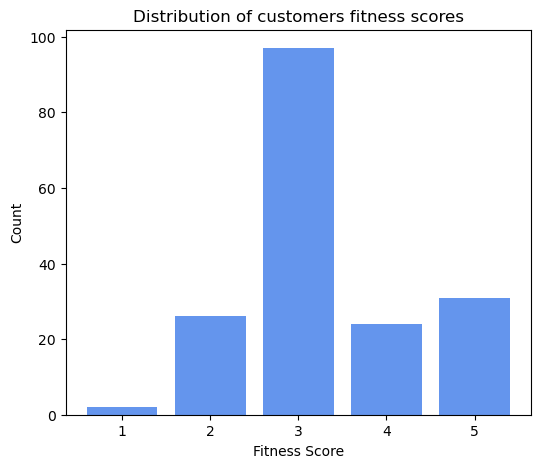

In [24]:
# ploting count of customers all 5 fitness scores.
count_fitness = df.groupby('Fitness')['Product'].count().reset_index()
plt.figure(figsize=(6,5))
plt.bar(count_fitness[::-1]['Fitness'],count_fitness[::-1]['Product'],color='cornflowerblue')
plt.xlabel('Fitness Score')
plt.title('Distribution of customers fitness scores')
plt.ylabel('Count')
plt.show()

Maximum customers have rated their fitness at a scale of 3.

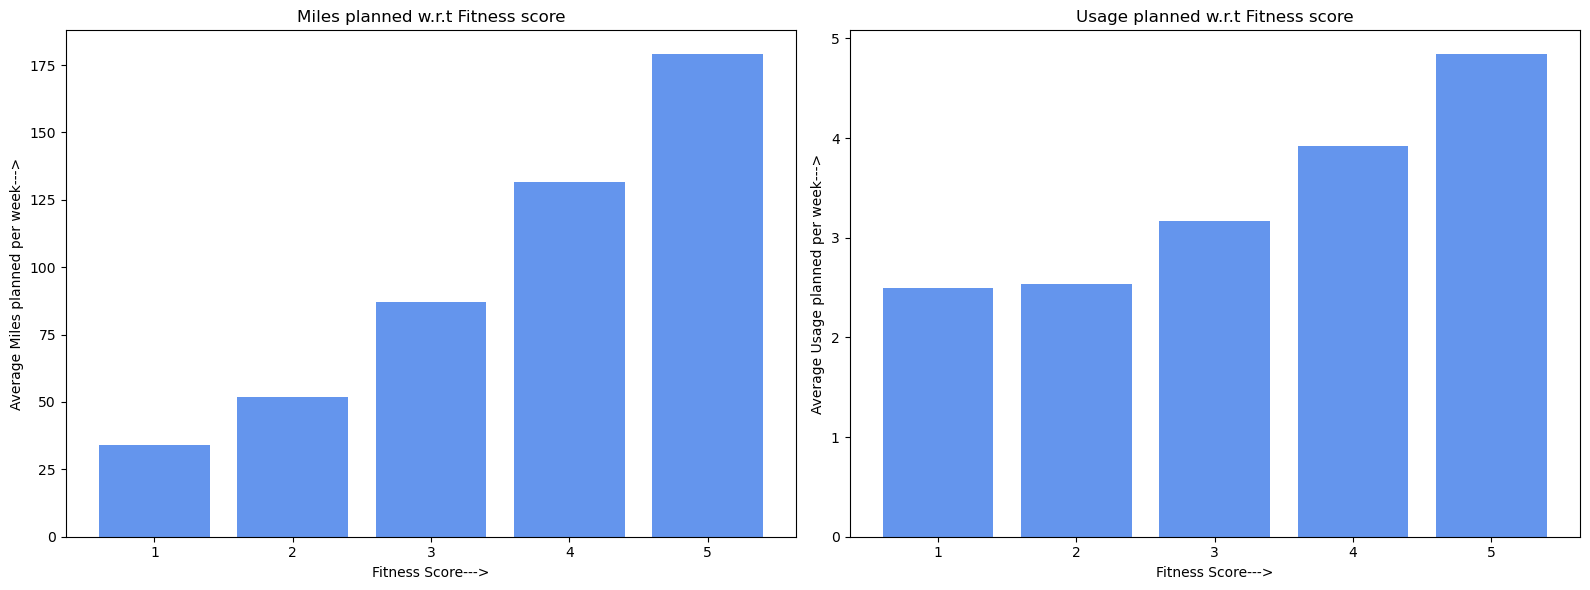

In [25]:
# Data preparation
fit_mil = df.groupby('Fitness')['Miles'].mean()
fit_usg = df.groupby('Fitness')['Usage'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plotting the first subplot
axs[0].bar(fit_mil.index.astype(str), fit_mil.values, color='cornflowerblue')
axs[0].set_xlabel('Fitness Score--->')
axs[0].set_ylabel('Average Miles planned per week--->')
axs[0].set_title('Miles planned w.r.t Fitness score')

# Plotting the second subplot
axs[1].bar(fit_usg.index.astype(str), fit_usg.values, color='cornflowerblue')
axs[1].set_xlabel('Fitness Score--->')
axs[1].set_ylabel('Average Usage planned per week--->')
axs[1].set_title('Usage planned w.r.t Fitness score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Its obviuos that more the fitness of the person, more will be his target(miles). Also the customers with low fitness levels are not even planning any big targets.

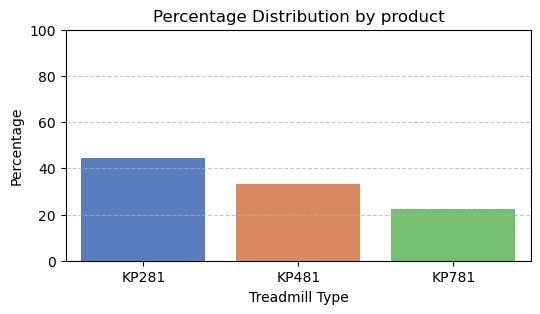

In [26]:
# Number of products of different types.
product_series = df['Product'].value_counts()
# percentage of Males and Females.
percentage_series = (product_series / product_series.sum()) * 100
plt.figure(figsize=(6, 3))  # Adjust figure size if needed
sns.barplot(x=percentage_series.index, y=percentage_series.values, palette='muted')  # You can adjust palette if needed
plt.xlabel('Treadmill Type')
plt.ylabel('Percentage')
plt.title('Percentage Distribution by product')
plt.ylim(0, 100)  # Ensure the y-axis starts from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

About 45% of the customers are preferring the entry level treadmill and almost 70% demand is for Entry and Mid level treadmills itself. Only about 20% customers look for purchasing the Pro level treadmill.

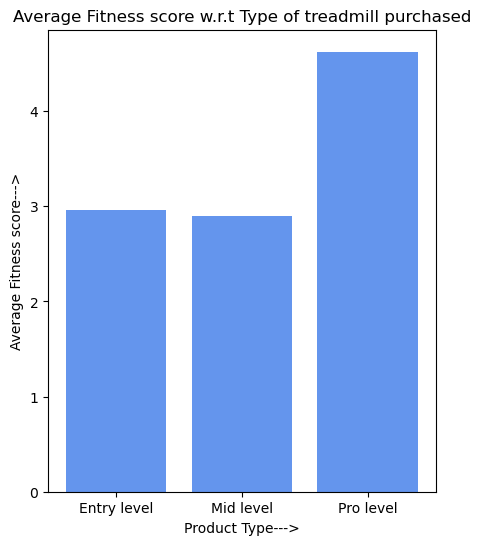

In [27]:
# Getting average of fitness score of customers purchasing each type of treadmill. 
fit_type = df.groupby('Product_type')['Fitness'].mean()
# Plotting
plt.figure(figsize=(5, 6))  # Adjust figure size
plt.bar(fit_type.index.astype(str), fit_type.values, color='cornflowerblue')
plt.xlabel('Product Type--->')
plt.ylabel('Average Fitness score--->')
plt.title('Average Fitness score w.r.t Type of treadmill purchased')
plt.show()

Customers purchasing Entry and Mid level treadmills are having almost similar fitness but the customers of Pro level have very good fitness levels and most probably they will try to maintain and improve it. So customers with good fitness levels are more likely to go for a Pro-level treadmill purchase.

In [28]:
'''Now getting boxplots to find out the outliers.'''

'Now getting boxplots to find out the outliers.'

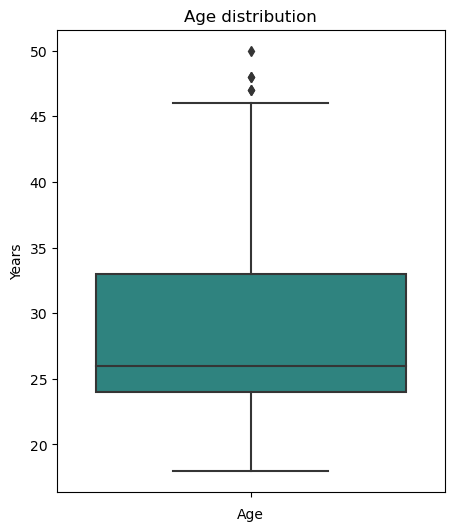

In [29]:
# Considering the distribution of age.
plt.figure(figsize=(5, 6))
# Create a boxplot for the 'duration' column
sns.boxplot(y='Age', data=df, palette='viridis')

# labels and title
plt.xlabel('Age')
plt.ylabel('Years')
plt.title('Age distribution')

# Show the plot
plt.show()

Upper wisker is 1.5*(33-24)+33 = 46.50 and lower wisker will be at minimum i.e. 18.

In [30]:
df['Age'].describe()            # Above boxplot representing the outliers and Inter-Quertile ranges.

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [31]:
# No of outliers in the Age.
len(df[df['Age']>46.5])

5

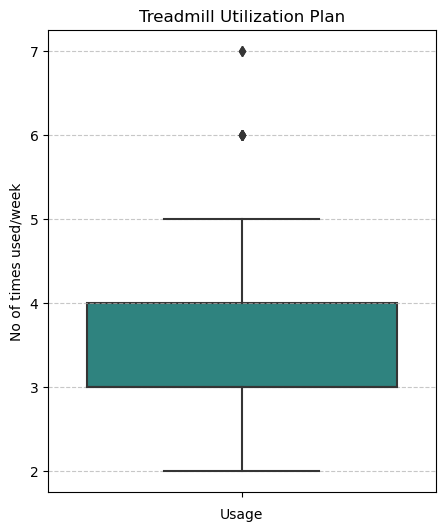

In [32]:
# Considering the distribution of usage.
plt.figure(figsize=(5, 6))
# Create a boxplot for the 'duration' column
sns.boxplot(y='Usage', data=df, palette='viridis')

# labels and title
plt.xlabel('Usage')
plt.ylabel('No of times used/week')
plt.title('Treadmill Utilization Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Here we see some interesting observation that both 25th and 50th percentile coincided at number 3 and upper wisker is at 5.

In [33]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [34]:
# No of outliers in usage plan.
len(df[df['Usage']>5])          

9

In [35]:
df[df['Usage']>5]['Usage'].unique()              # Unique values of the outliers.

array([6, 7], dtype=int64)

Here we can see 9 outliers in usage plan at 6 and 7.

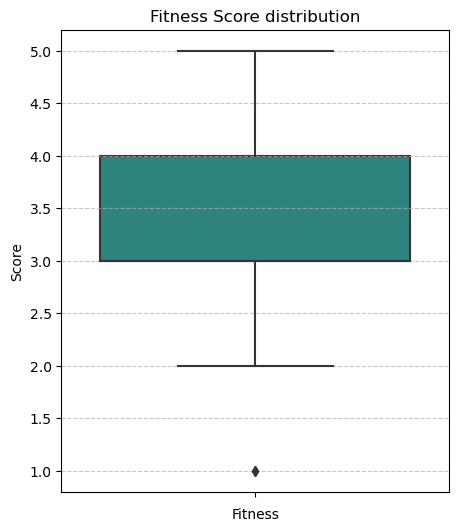

In [36]:
# Considering the distribution of Fitness score.
plt.figure(figsize=(5, 6))
# Create a boxplot for the 'duration' column
sns.boxplot(y='Fitness', data=df, palette='viridis')

# labels and title
plt.xlabel('Fitness')
plt.ylabel('Score')
plt.title('Fitness Score distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show() 

Both 25th and 50th percentile coincide at 3.0 and lower wisker is at 2.0

In [37]:
df['Fitness'].describe()                # Stats of the fitness.

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [38]:
# No of outliers in Fitness.
len(df[df['Fitness']<2])

2

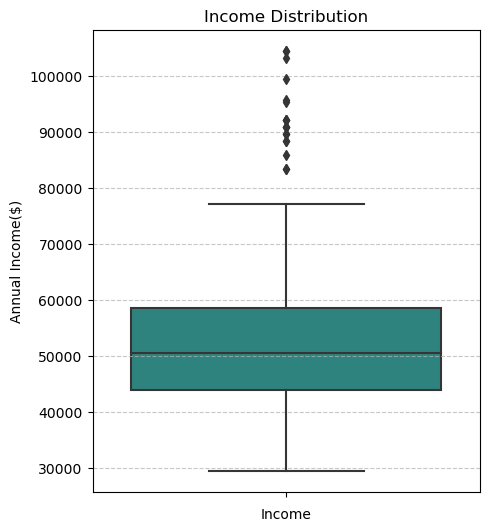

In [39]:
# Considering the distribution of Income.
plt.figure(figsize=(5, 6))
# Create a boxplot for the 'duration' column
sns.boxplot(y='Income', data=df, palette='viridis')

# labels and title
plt.xlabel('Income')
plt.ylabel('Annual Income($)')
plt.title('Income Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

We can see many outliers in the income attribute which is expected.

In [40]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

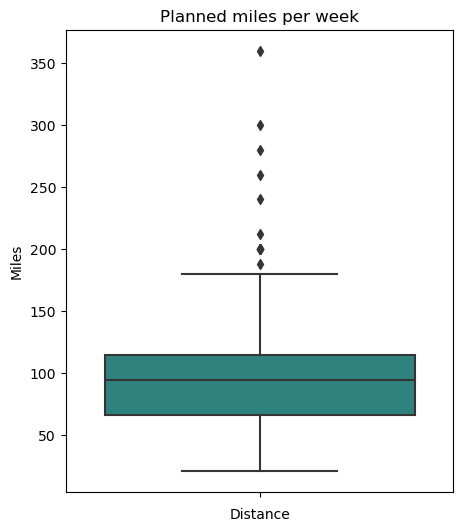

In [41]:
# Considering the distribution of Miles.
plt.figure(figsize=(5, 6))
# Create a boxplot for the 'duration' column
sns.boxplot(y='Miles', data=df, palette='viridis')

# labels and title
plt.xlabel('Distance')
plt.ylabel('Miles')
plt.title('Planned miles per week')

# Show the plot
plt.show()

Upper wisker is at 1.5*(114.75-66)+114.75 = 187.875 . Above that will be outliers.

In [42]:
df['Miles'].describe()                # Stats of miles column.

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [43]:
# No of outliers in miles.
len(df[df['Miles']>187.875]) 

13

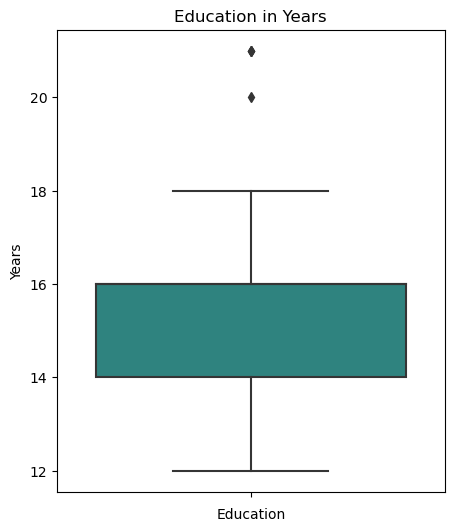

In [44]:
# Considering the distribution of Education.
plt.figure(figsize=(5, 6))
# Create a boxplot for the 'duration' column
sns.boxplot(y='Education', data=df, palette='viridis')

# labels and title
plt.xlabel('Education')
plt.ylabel('Years')
plt.title('Education in Years')

# Show the plot
plt.show()

In [45]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [46]:
# No of outliers in years of Education.
len(df[df['Education']>18])

4

In [47]:
df['MaritalStatus'].unique()        # Unique enteries in the Marital Status column.

array(['Single', 'Partnered'], dtype=object)

In [48]:
'''Now getting out the stats on the basis of Age-group'''

'Now getting out the stats on the basis of Age-group'

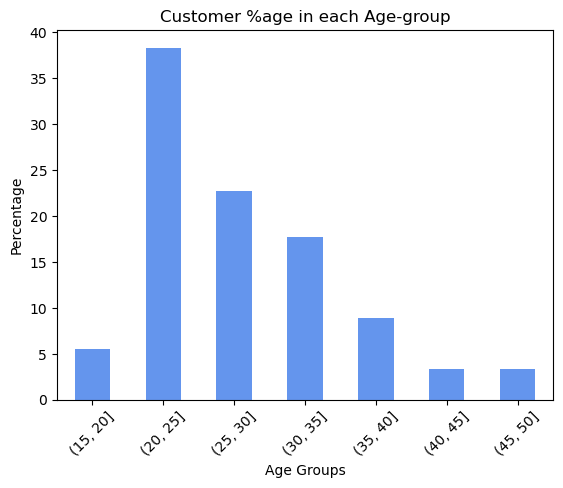

In [49]:
# Count occurrences of each age bin
age_perc = df['Age_Bin'].value_counts().sort_index()/len(df)*100

# Plotting
age_perc.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.title('Customer %age in each Age-group')
plt.xticks(rotation=45)
plt.show()

Most of the customers (about 60%) are from the age-group of 20-30 i.e. treadmills are mostly used by young adults.

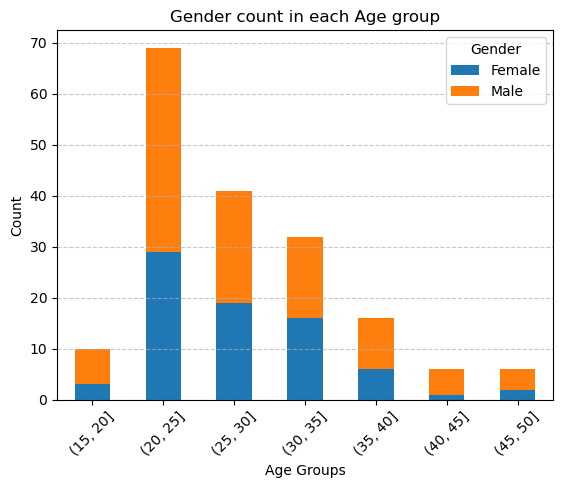

In [50]:
# Gender wise distribution w.r.t age group.
gender_counts = df.groupby(['Age_Bin', 'Gender']).size().unstack(fill_value=0)

# Plotting
gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Gender count in each Age group')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Number of male customers are more in almost all age groups which indicates males are more health conscious.

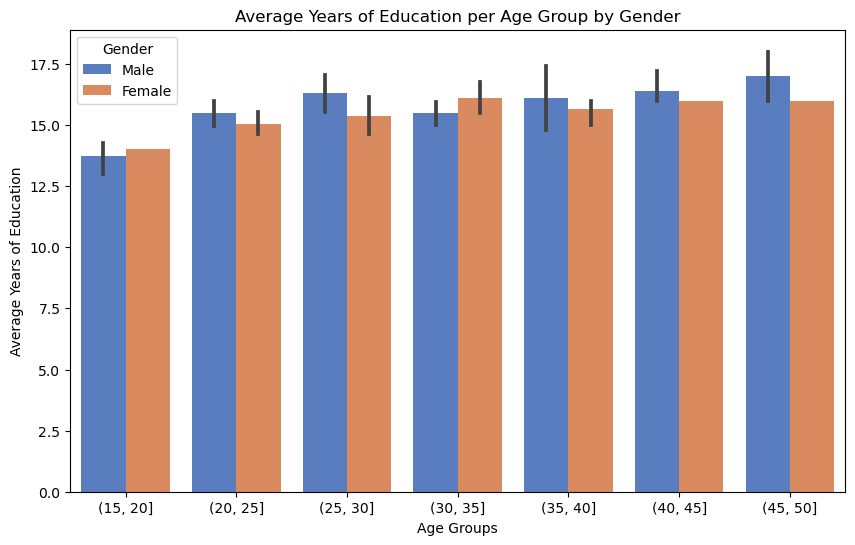

In [51]:
# Plotting Avg duration of education w.r.t. age-group and gender.
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(data=df, x='Age_Bin', y='Education', hue='Gender', palette='muted')
plt.xlabel('Age Groups')
plt.ylabel('Average Years of Education')
plt.title('Average Years of Education per Age Group by Gender')
plt.legend(title='Gender')
plt.show()

Average Education level(Years) of both genders and almost all age groups is approximately same or slightly increasing with the age which is expected.

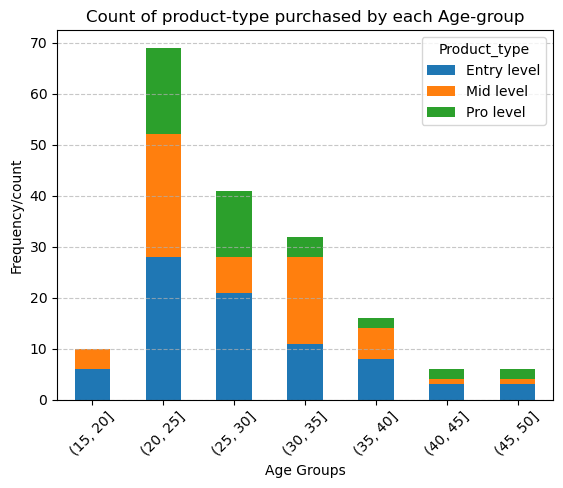

In [52]:
# Number of treadmills of each type purchased by each age group.
type_counts = df.groupby(['Age_Bin', 'Product_type']).size().unstack(fill_value=0)

# Plotting
type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Frequency/count')
plt.title('Count of product-type purchased by each Age-group')
plt.xticks(rotation=45)
plt.legend(title='Product_type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the age groups are prefering to purchase the Entry-level treadmill but customers of age group 30-35 have preferred the Mid-level treadmill. Also Pro-level treadmills are mostly preferred by age group from 21-30.


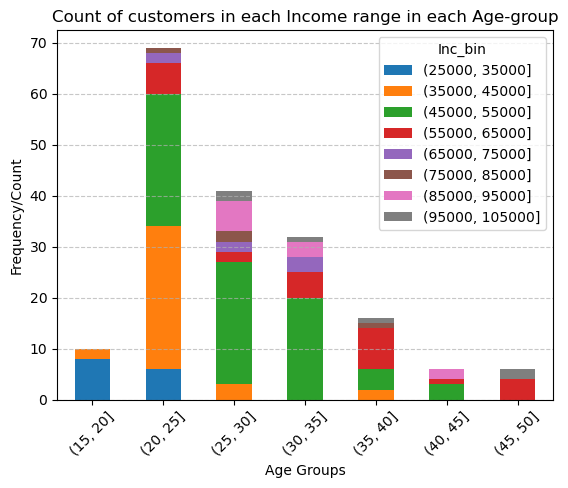

In [53]:
# Number of customers in each Income group within each age group.
sal_counts = df.groupby(['Age_Bin','Inc_bin']).size().unstack(fill_value=0)
# Plotting
sal_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Frequency/Count')
plt.title('Count of customers in each Income range in each Age-group')
plt.xticks(rotation=45)
plt.legend(title='Inc_bin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the customers are of 20-30 age group and most of them have a Income in the range 35000-55000$ annually. 

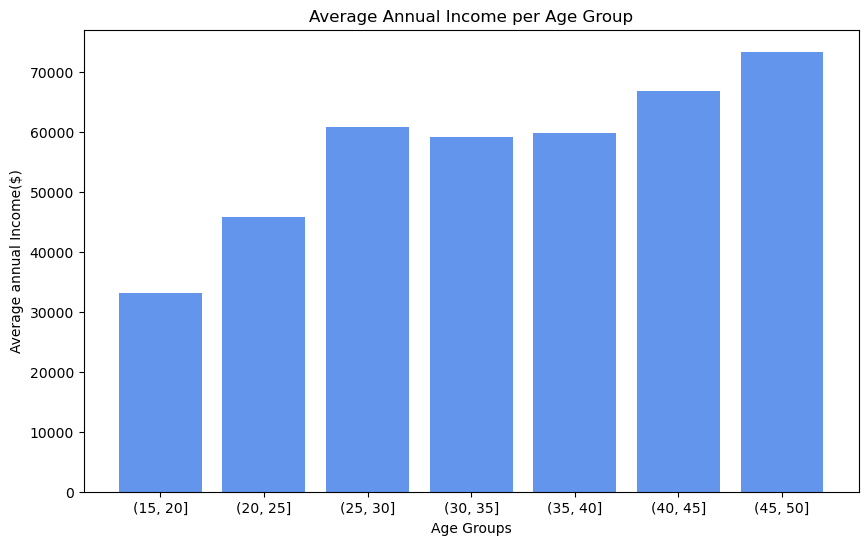

In [54]:
# Average income of each age group.
avg_inc = df.groupby('Age_Bin')['Income'].mean()
# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.bar(avg_inc.index.astype(str), avg_inc.values, color='cornflowerblue')
plt.xlabel('Age Groups')
plt.ylabel('Average annual Income($)')
plt.title('Average Annual Income per Age Group')
plt.show()

Average annual Income can be seen increasing with the age which is expected. So from above few graphs, we can see a trend that rich, more educated and elderly age group seems less interested in treadmills.

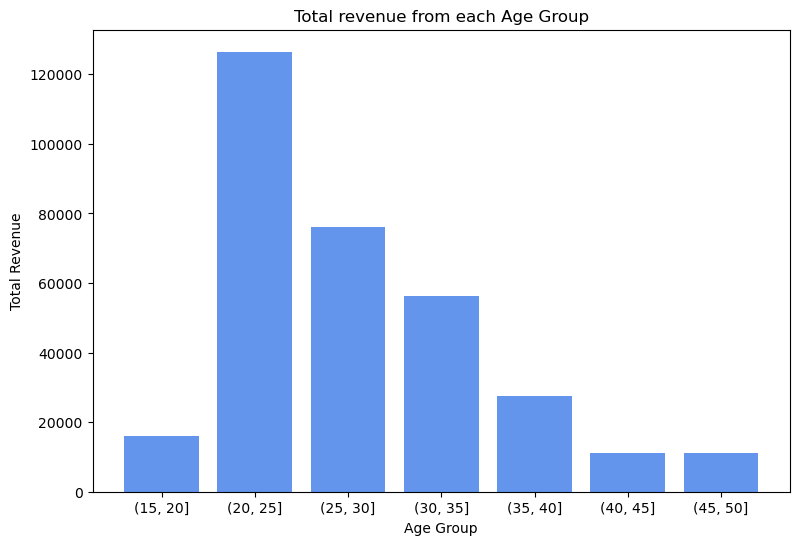

In [55]:
# Getting total revenue from each age group. 
age_pri = df.groupby('Age_Bin')['Price'].sum()
# Plotting
plt.figure(figsize=(9, 6))  # Adjust figure size
plt.bar(age_pri.index.astype(str), age_pri.values, color='cornflowerblue')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.title('Total revenue from each Age Group')
plt.show()

Although the Average Income of the 20-25 age-group is less(45000$ annually) but most of the revenue of the company is comming from this age-group itself.

In [56]:
df['Income'].unique().min()           # Customer with least salary.

29562

In [57]:
df['Income'].unique().max()           # Customer with maximum salary.

104581

In [58]:
'''Stats based on Income Range'''

'Stats based on Income Range'

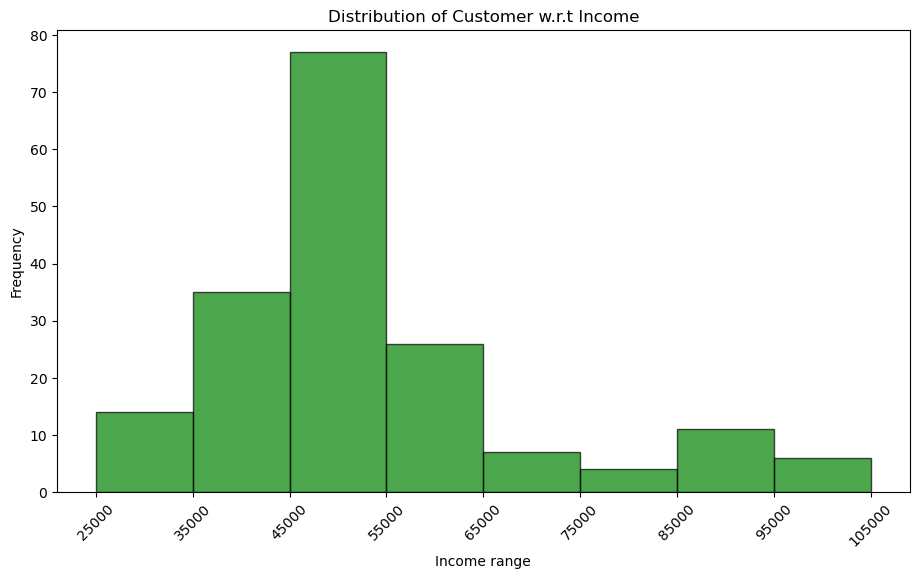

In [59]:
# Defining income bins
inc_bins = [25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000]

# Plotting
plt.figure(figsize=(11, 6))  # Adjusting figure size
plt.hist(df['Income'], bins=inc_bins, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Income range')
plt.ylabel('Frequency')
plt.title('Distribution of Customer w.r.t Income')
plt.xticks(inc_bins, rotation=45)
plt.show()


Maximum customers are in the range of 45000-55000$ annual income.

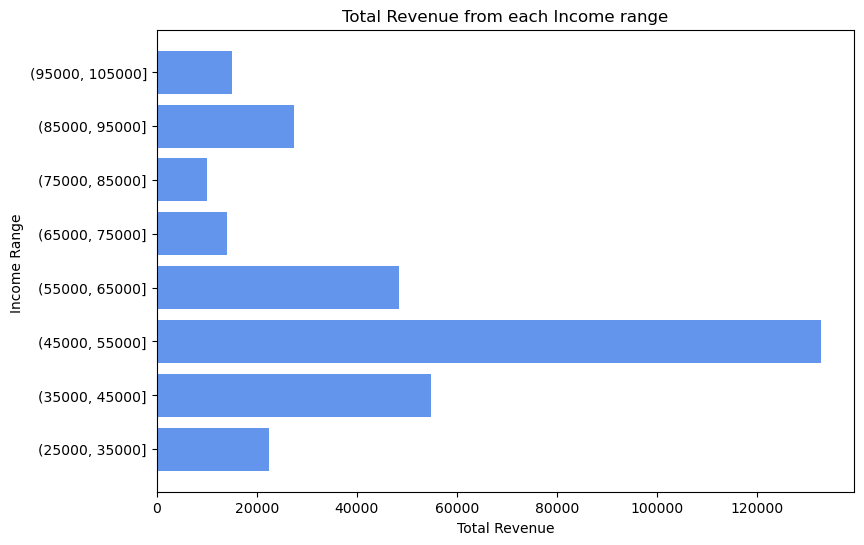

In [60]:
# Getting total revenue of each Income group. 
Inc_ps = df.groupby('Inc_bin')['Price'].sum()
# Plotting
plt.figure(figsize=(9, 6))  # Adjust figure size
plt.barh(Inc_ps.index.astype(str), Inc_ps.values, color='cornflowerblue')
plt.xlabel('Total Revenue')
plt.ylabel('Income Range ')
plt.title('Total Revenue from each Income range')
plt.show()

Most of the company's revenue comes from the customers having Income ranging from 45000 to 55000 since maximum customers are also in this Income range itself.

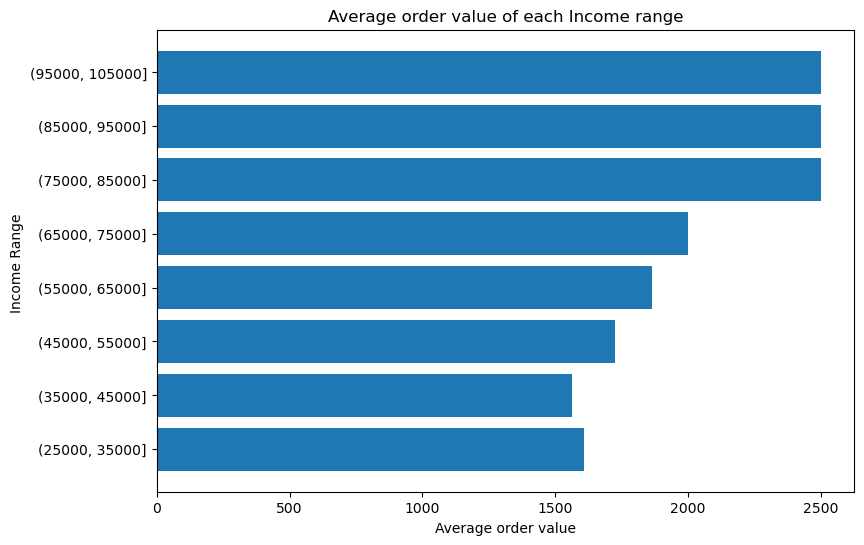

In [61]:
Inc_p = df.groupby('Inc_bin')['Price'].mean()
# Plotting
plt.figure(figsize=(9, 6))  # Adjust figure size
plt.barh(Inc_p.index.astype(str), Inc_p.values)
plt.xlabel('Average order value')
plt.ylabel('Income Range ')
plt.title('Average order value of each Income range')
plt.show()

Even though most of the revenue of the company comes from 45k-55k Income range but the highest value per order is comming from the income range of 75000 to 105000($).

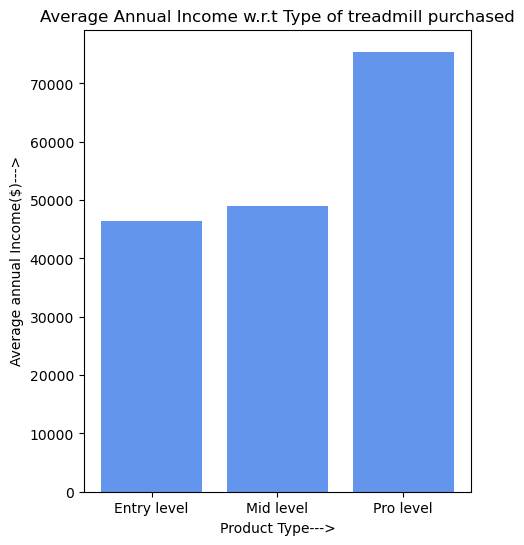

In [62]:
# Getting average income of customers purchasing each type of treadmill. 
type_inc = df.groupby('Product_type')['Income'].mean()
# Plotting
plt.figure(figsize=(5, 6))  # Adjust figure size
plt.bar(type_inc.index.astype(str), type_inc.values, color='cornflowerblue')
plt.xlabel('Product Type--->')
plt.ylabel('Average annual Income($)--->')
plt.title('Average Annual Income w.r.t Type of treadmill purchased')
plt.show()

The Avg. Income of the customers buying the pro level treadmill is very high which is expected. But there not much difference in the Average incomes of customers purchasing Entry level and Mid level which indicates that the customers purchasing entry level treadmill can also afford mid level if they find enough value in it.

In [63]:
'''Contingency tables and conditional probabilities.'''

'Contingency tables and conditional probabilities.'

In [64]:
# Getting the contingency table for the Product and Gender to calculate some interesting stats.

prob_sts = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)
prob_sts

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


The above contingency table can be used to calculate probabilities for various senarios like:
1. Probability of males/females purchasing certain kind of treadmill.
2. Probability of say KP481 being purchased given that customer is male.
3. Probability of customer being male given that he purchased KP781.
4. Probability of KP481 being purchased etc.
5. Also we can see the total is 180 which is the count of total number of records.

In [65]:
# Getting the probability of males/females purchasing a pirticular type of treadmill.

prob_with_margins = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, normalize='all')
prob_with_margins

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


From this normalized table we can infer many interesting stats related to probability like:
1. Probability of KP281 being purchased is maximum(44.44%) followed by probability of KP481 at 33.33% and that of KP781 is 22.23%.
2. Probability of Male customers buying KP781 treadmill is 18.34%.
3. Probability of female customer buying KP481 treadmill is 16.11% etc.

In [66]:
# Getting the contingency table for the product and marital status to calc the probability of 
# males purchasing a pirticular type of treadmill.

prob_wt_margins = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)
prob_wt_margins

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


Lets now use this contingency table to calculate some conditional probabilities. We need to normalize the table either w.r.t columns or index to get it normalized.

In [67]:
# Calc the conditional probabilities normalized along columns.

prob_ww_margins = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True, normalize='columns')
prob_ww_margins

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


Here we have normalized the table with columns. As we know whenever we normalize the table w.r.t. columns or index then we will get conditional probabilities in the resultant table. So we can see:
1. Probability of KP481 being purchased given that the customer is Partnered is 33.65%.
2. Similarly probability of purchase of KP781 given that the customer is Single is 23.29%.
3. Similarly we can also get probabilities for many more given conditions.

In [68]:
'''Heat maps and Pair plots for bivariant analysis'''

'Heat maps and Pair plots for bivariant analysis'

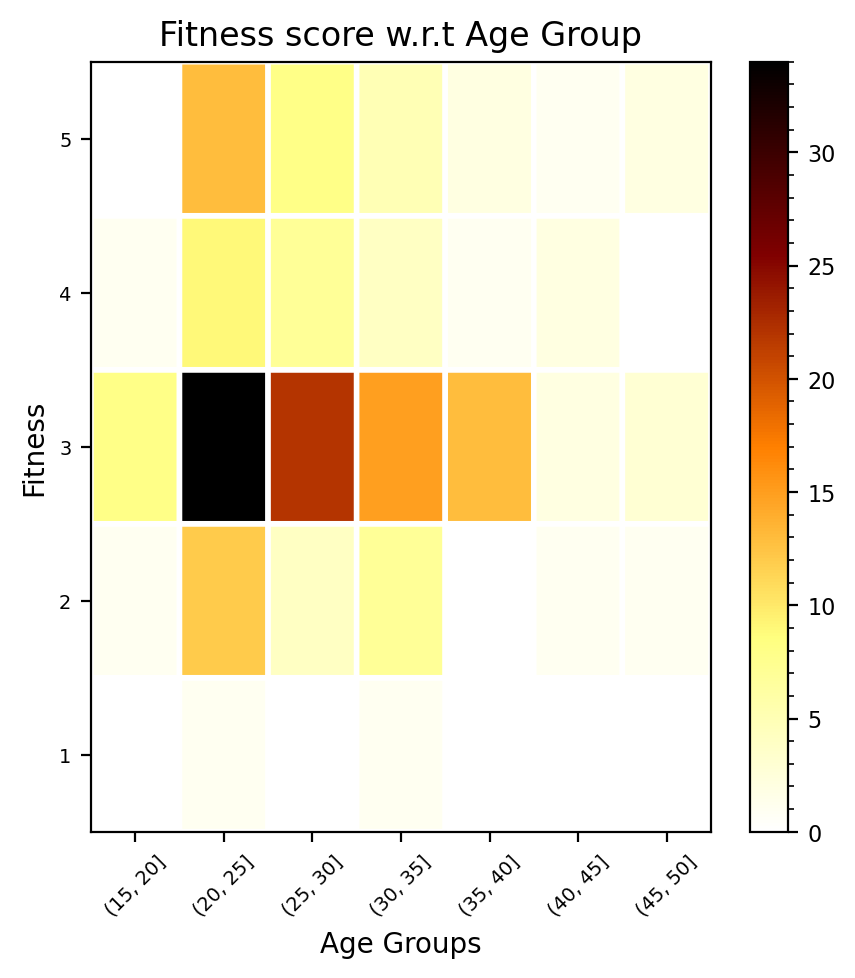

In [69]:
# Bivariant analysis of the Fitness score for each age group.(Heat Map)

df_dt = df.groupby('Age_Bin')['Fitness'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(5, 5), dpi=200)


plt.pcolor(df_dt, cmap='afmhot_r', edgecolors='white', linewidths=2)     # heatmap
plt.xticks(np.arange(0.5, len(df_dt.columns), 1), df_dt.columns, fontsize=7, rotation=45)
plt.yticks(np.arange(0.5, len(df_dt.index), 1), df_dt.index, fontsize=7)
plt.xlabel('Age Groups')
plt.ylabel('Fitness')
plt.title('Fitness score w.r.t Age Group')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

From the heatmap its clear that most of the customers are from 20-30 age group and have rated their fitness to 3. 

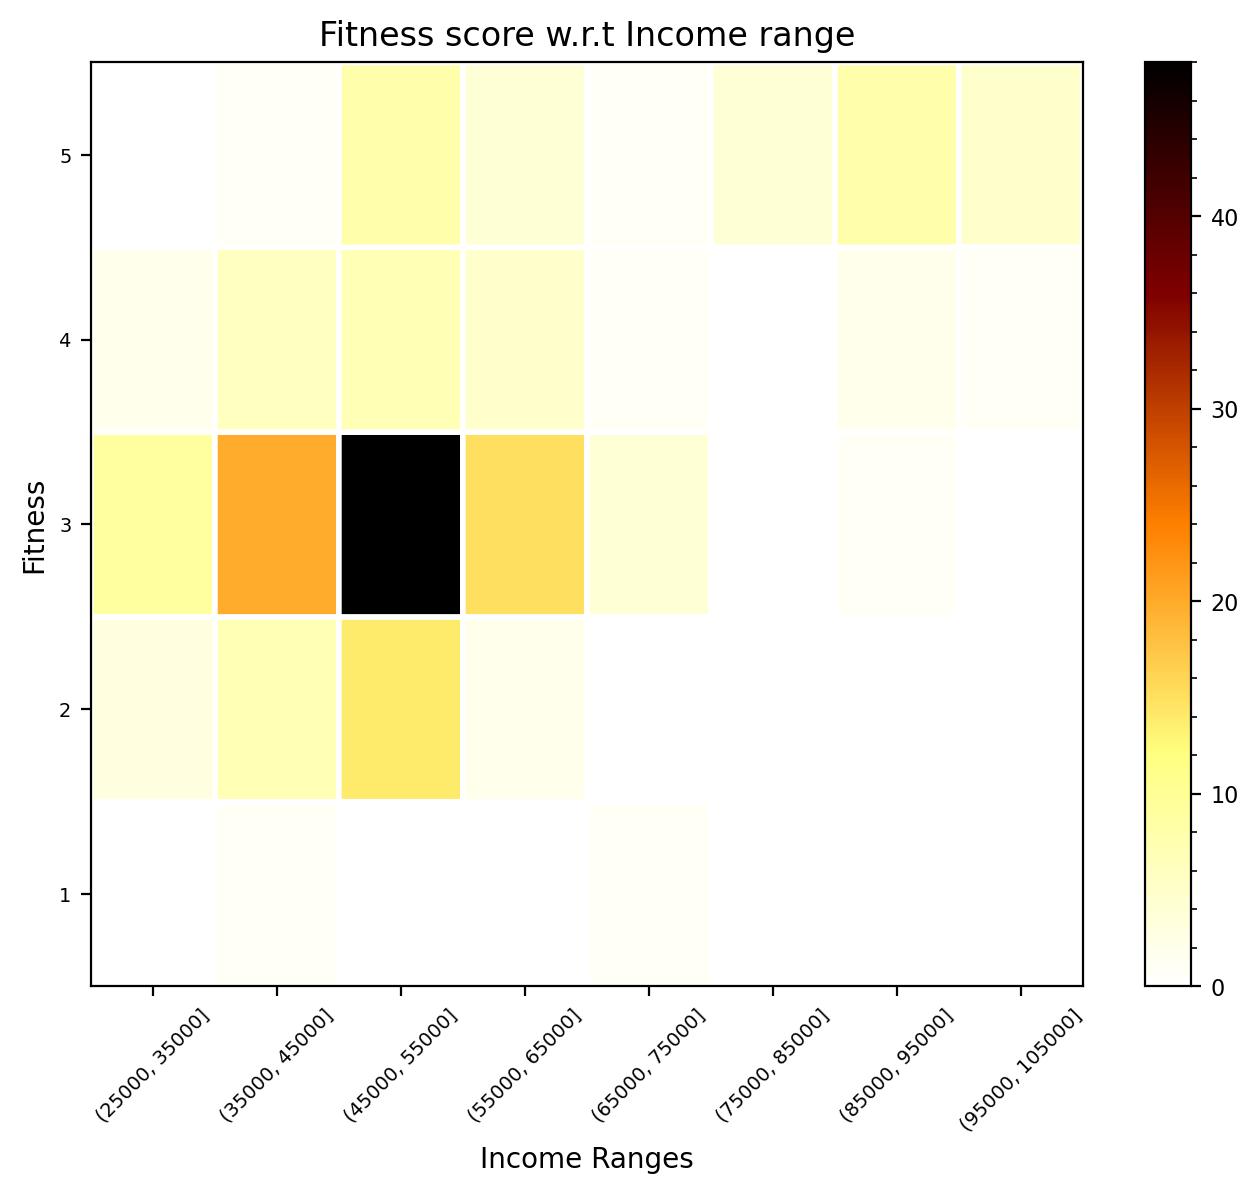

In [70]:
# Bivariant analysis of the Fitness score for each Income range.(Heat Map)

df_dr = df.groupby('Inc_bin')['Fitness'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(8, 6), dpi=200)


plt.pcolor(df_dr, cmap='afmhot_r', edgecolors='white', linewidths=2)     # heatmap
plt.xticks(np.arange(0.5, len(df_dr.columns), 1), df_dr.columns, fontsize=7, rotation=45)
plt.yticks(np.arange(0.5, len(df_dr.index), 1), df_dr.index, fontsize=7)
plt.xlabel('Income Ranges')
plt.ylabel('Fitness')
plt.title('Fitness score w.r.t Income range')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

Clearly customers from 45000-55000 Income group with fitness score 3 are the majorly purchasing treadmills.

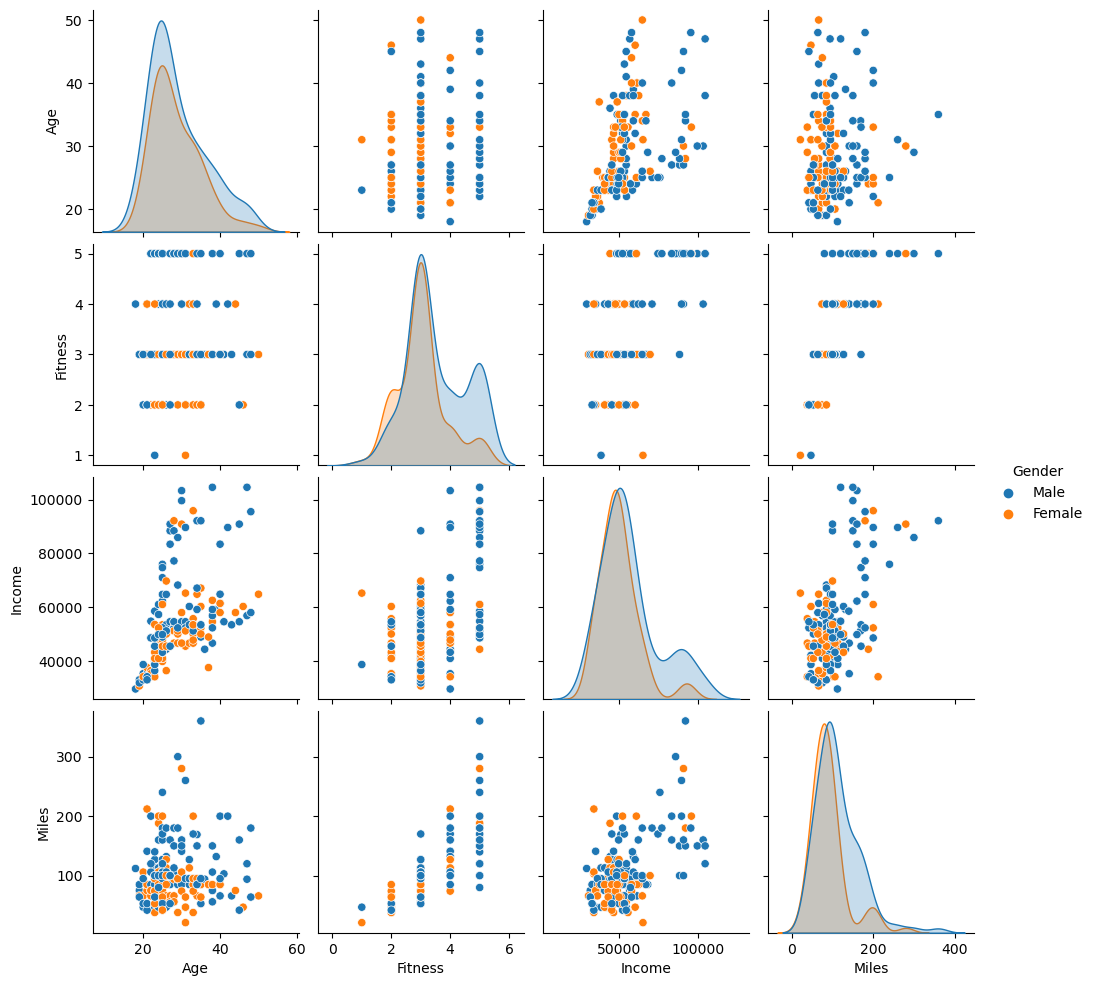

In [71]:
# Getting pairplot for 4 most important parameters named Age, Fitness, Income and Miles to see if 
# there is any correlation among them with gender as hue.

dff = df[['Age','Fitness','Income','Miles','Gender']]
sns.pairplot(dff,hue = 'Gender')
plt.show()

Clearly male dominance is visible with respect to all 4 attributes i.e. Age, fitness, Income and miles.

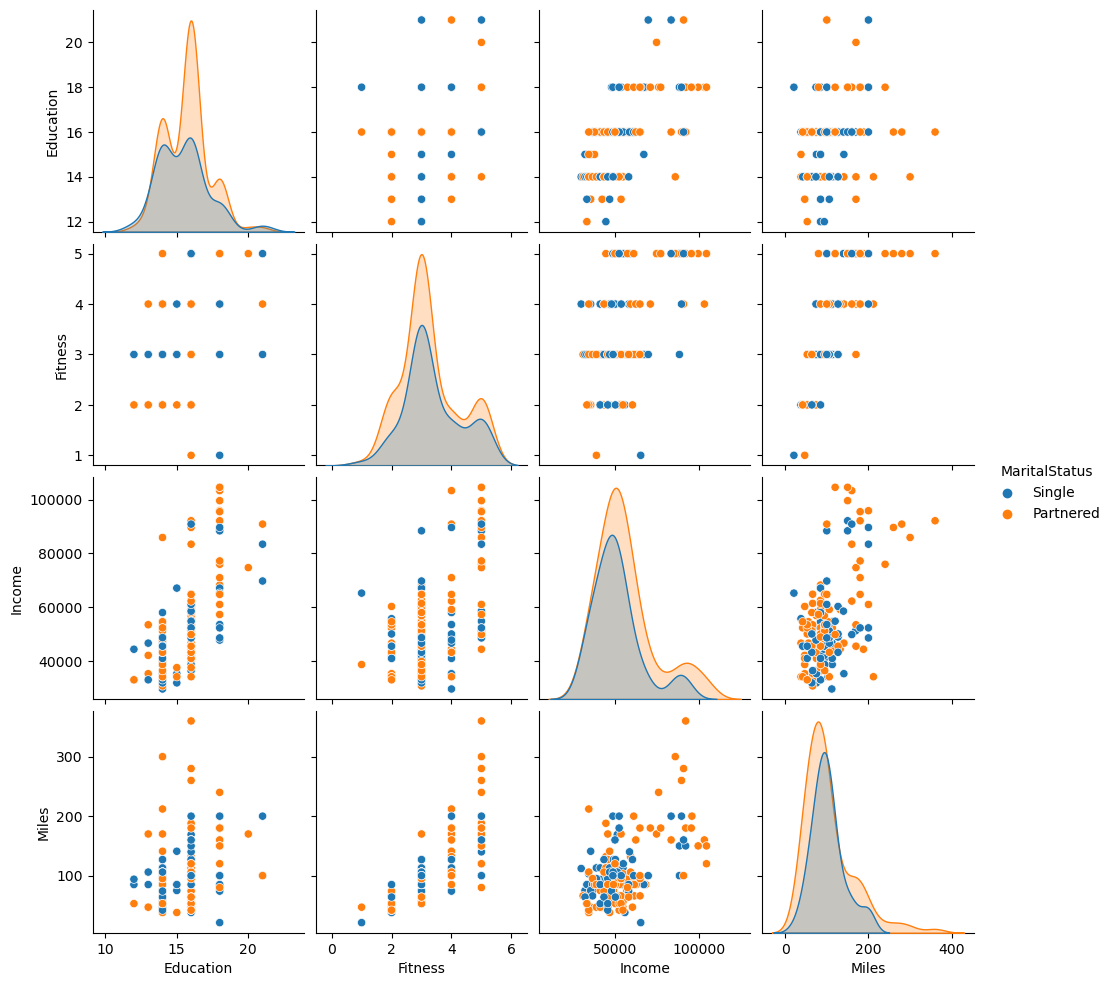

In [72]:
# Getting pairplots for Education, Fitness, Income and Miles to see if 
# there is any correlation among them with Marital Status as hue.

dfe = df[['MaritalStatus','Education','Fitness','Income','Miles']]
sns.pairplot(dfe,hue='MaritalStatus')
plt.show()

Partnered customers seem more concerned of their fitness which is visible from above pair plots

In [73]:
'''Correlation matrix to check for some inter-relation among some numeric attributes'''

'Correlation matrix to check for some inter-relation among some numeric attributes'

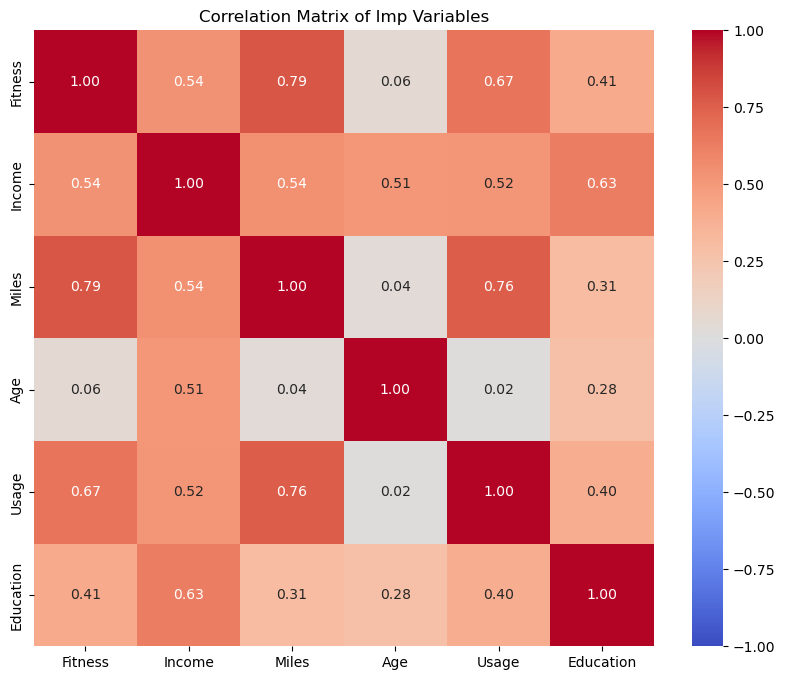

In [74]:
# Compute correlation matrix as Heat map.
correlation_matrix = df[['Fitness', 'Income', 'Miles', 'Age','Usage','Education']].corr()

# Visualization of correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Imp Variables')
plt.show()

1. Fitness and Miles planned seem to have good correlation(0.79) and also fitness and age have least correlation(0.06).
2. Miles and Usage also seem to have some correlation(0.76) because as the planned miles increase then the usage would obviously increase. 
3. Education, Income and Age dont seem to have any good correlation with any other attributes.

------------------------------

## 3. Business Insights

1. The customers of Aerofit are of age ranging from 18 to 50 years.

2. The customers are having 12 to 21 years of education.

3. About 60% of the customers are male.

4. Also 60% customers are partnered. Partnered customers seem more concerned of their fitness.

5. Average income of males customers is more in both Partnered as well as in Single category.

6. Maximum customers have rated their fitness at a scale of 3.

7. About 45% of the customers are preferring the entry level treadmill and almost 70% demand is for Entry and Mid level treadmills itself. Only about 20% customers look for purchasing the Pro level treadmill.

8. Most of the customers (about 60%) are from the age-group of 20-30 i.e. treadmills are more preferred by young adults.

9. Number of male customers are more in almost all age groups which indicates males are more health conscious.

10. Most of the age groups are prefering to purchase the Entry-level treadmill but customers of age group 30-35 have preferred the Mid-level treadmill. Also Pro-level treadmills are mostly preferred by age group from 21-30.

11. Most of the customers are of 20-30 age group and most of them have a Income in the range 35000-55000 annually.

12. We can see a trend that rich, more educated and elderly age group seems less interested in treadmills.

13. Although the Average Income of the 20-25 age-group is less(45000 dollars annually) but most of the revenue of the company is comming from this age-group itself.

14. Maximum customers are in the range of 45000-55000 dollars annual income.

15. Most of the company's revenue comes from the customers having Income ranging from 45000 to 55000.

16. Even though most of the revenue of the company comes from 45k-55k Income range but the highest value per order is comming from the income range of 75000 to 105000 dollars.

17. The Avg. Income of the customers buying the pro level treadmill is very high which is expected. But there not much difference in the Average incomes of customers purchasing Entry level and Mid level which indicates that the customers purchasing entry level treadmill can also afford mid level if they find enough value in it.

18. Customers purchasing Entry and Mid level treadmills are having almost similar fitness but the customers of Pro level have very good fitness levels and most probably they will try to maintain and improve it. So customers with good fitness levels are more likely to go for a Pro-level treadmill purchase.
----------------------------------------------------------------------------------------------------------------
19. Fitness and Miles planned seem to have good correlation(0.79) and also fitness and age have least correlation(0.06).
20. Miles and Usage also seem to have some correlation(0.76) because as the planned miles increase then the usage would obviously increase.
21. Education, Income and Age dont seem to have any good correlation with any other attributes.
----------------------------------------------------------------------------------------------------------------
22. Probability of KP281 being purchased is maximum(44.44%) followed by probability of KP481 at 33.33% and that of KP781 is 22.23%.
23. Probability of Male customers buying KP781 treadmill is 18.34%.
24. Probability of female customer buying KP481 treadmill is 16.11% etc.
25. Probability of KP481 being purchased given that the customer is Partnered is 33.65%.
26. Similarly probability of purchase of KP781 given that the customer is Single is 23.29%.


---------------------

## 4. Recommendations

1. Company should focus more on the age group of 20-30 years as young adults are more inclined towards fitness.
2. Company should promote KP481 more to the Income class of 45000 and above as there is very less price difference between KP281 and KP481, also this income range can afford the KP481 easily.
3. Company should try to introduce another product in between KP481 and KP781 because the price difference between them  is significant and also the sales numbers have significant difference. If there was an option at about 2000 dollars then may be customers would have more convenience of choice at equal interval of price points.
4. Customers having good fitness will tend to buy treadmill with more features and customization options. So company should recommend the high-end treadmills with more customization options to them.
5. If the customer is partnered then company should promote/recommend Mid level treadmills to them as there is a higher probability of them purchasing KP481.
6. Advertisments/promotions of treadmills should be attractive specially targeting the age group of 20-35 years.
7. Since most of the sales is of the Entry level treadmill(about 44.45%), so company should try to improve the margins in KP281 and make it more efficient and introduce some customization options for the customers with small additional costs which will automatically make customers think to go for Mid level treadmill purchase. This will increase the overall profatibility of the company to some extent.